Prompt: Genera un ejercicio para aplicar X. Las características del ejercicio son:

- No pongas objetivos muy extensos (considera que el ejercicio debe de ser didáctico y enfocado en aplicar la técnica correspondiente)
- Genera el enunciado correspondiente con los entregables esperados
- Dame la solución conceptual o en código según sea el caso 





Prompt para comentar codigo:

En el siguiente código, explica de forma intuitiva, ordenada y resumidamente delante de cada línea qué es lo que hace 

# 1.- Medir el sobreajuste e infrajuste 



## Enunciado

Una empresa desea predecir la cantidad de ventas mensuales (en miles de unidades) a partir del presupuesto en publicidad digital (en miles de dólares). Te han proporcionado un conjunto de datos históricos y desean que construyas un modelo que:

1. Analice si hay infraajuste, buen ajuste o sobreajuste según el grado del polinomio utilizado.
2. Evalúe el desempeño del modelo en entrenamiento y prueba.
3. Grafique la relación real y las curvas ajustadas para distintos grados polinómicos.

Objetivos / Entregables esperados:

- Entrenar tres modelos de regresión polinómica: grados 1 (lineal), 2 y 10.

- Calcular el error MSE (Error Cuadrático Medio) en entrenamiento y prueba.

- Interpretar los resultados: ¿Qué modelo tiene sobreajuste? ¿Cuál infraajuste?

- Graficar los tres modelos sobre los datos reales.

In [ ]:
#data
import numpy as np       # Importa NumPy, una biblioteca para cálculos numéricos eficientes, ¡piensa en ella como una calculadora gigante para arreglos!
import pandas as pd      # Importa Pandas, una biblioteca para manejar y analizar datos en tablas, ¡como hojas de cálculo en Python!
import matplotlib.pyplot as plt # Importa Matplotlib para crear gráficos y visualizaciones, ¡perfecto para dibujar lo que representan tus datos!

# Semilla para reproducibilidad
np.random.seed(42)       # Fija la "semilla" para los números aleatorios, ¡así siempre obtendrás los mismos resultados aleatorios cada vez que ejecutes el código!

# Generar datos ficticios
X = np.linspace(0, 10, 30) # Crea un conjunto de 30 números espaciados uniformemente entre 0 y 10, ¡estos serán nuestros datos de "publicidad"!
y = 3*X**2 - 2*X + 5 + np.random.normal(0, 10, size=X.shape) # Calcula los "ingresos" (y) usando una fórmula basada en "publicidad" (X) y añade un poco de "ruido" aleatorio para que se vea más real.

data = pd.DataFrame({'Publicidad': X, 'Ventas': y}) # Combina nuestros datos de "publicidad" (X) y "ventas" (y) en una tabla de Pandas, ¡como organizar tus datos en columnas con nombres!
data.to_csv("ventas_publicidad.csv", index=False) # Guarda esta tabla de datos en un archivo CSV llamado "ventas_publicidad.csv" sin añadir un índice de fila, ¡para que puedas usarla más tarde en otros programas!

In [5]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Publicidad  30 non-null     float64
 1   Ventas      30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
   Publicidad     Ventas
0    0.000000   9.967142
1    0.344828   3.284420
2    0.689655  11.524448
3    1.034483  21.371797
4    1.379310   5.607337


c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


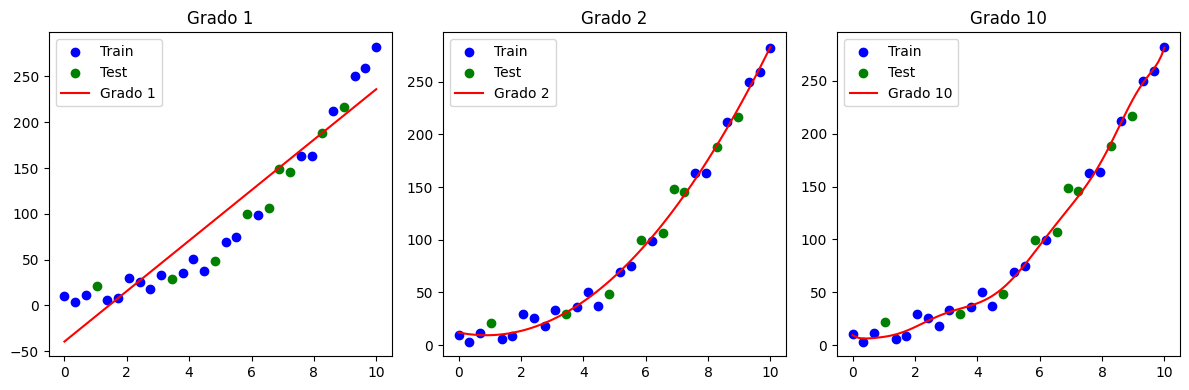

Grado 1 → MSE train: 822.22, MSE test: 646.23
Grado 2 → MSE train: 46.49, MSE test: 103.20
Grado 10 → MSE train: 31.97, MSE test: 121.87


In [2]:
#solucion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cargar datos
X = data[['Publicidad']]
y = data['Ventas']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Lista de grados a probar
grados = [1, 2, 10]

# Almacenar errores
errores = []

# Gráfico
plt.figure(figsize=(12, 4))

for i, grado in enumerate(grados, 1):
    poly = PolynomialFeatures(degree=grado)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    errores.append((grado, mse_train, mse_test))

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, color='red', label=f"Grado {grado}")
    plt.title(f"Grado {grado}")
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar errores
for g, e_tr, e_te in errores:
    print(f"Grado {g} → MSE train: {e_tr:.2f}, MSE test: {e_te:.2f}")


El principio que debemos seguir para medir el sobreajuste y subajuste es: 

- Si el error en entrenamiento es bajo, pero en prueba es alto, hay sobreajuste (overfitting).

- Si el error en entrenamiento es alto y también es alto en prueba, hay subajuste (underfitting).

- Si el error es bajo y similar en ambos conjuntos (entrenamiento y prueba), no hay sobreajuste ni subajuste; el modelo generaliza bien.

- En el gráfico 1 podemos observar un subajuste
- En el gráfico dos podemos observar que no hay ni sobre ajuste ni sub ajuste
- En el gráfico 3 podemos observar un sobreajuste

Aquí podemos concluir que el modelo con 2 grados es el óptimo

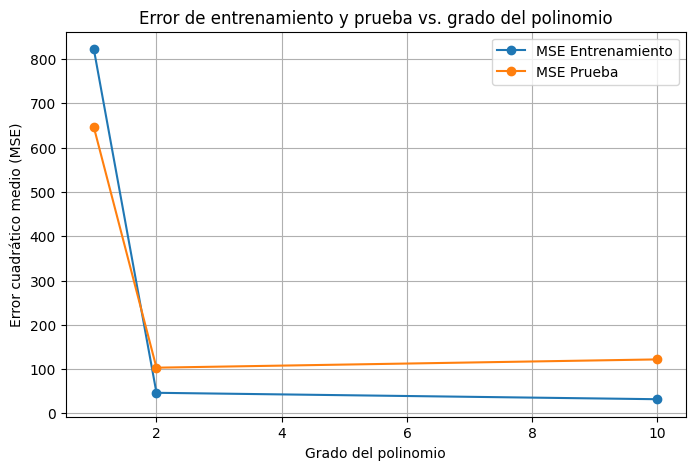

In [3]:
# Crear listas para los grados y los errores
grados = [g for g, _, _ in errores]
mse_train = [e_tr for _, e_tr, _ in errores]
mse_test = [e_te for _, _, e_te in errores]

plt.figure(figsize=(8,5))
plt.plot(grados, mse_train, marker='o', label='MSE Entrenamiento')
plt.plot(grados, mse_test, marker='o', label='MSE Prueba')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error de entrenamiento y prueba vs. grado del polinomio')
plt.legend()
plt.grid(True)
plt.show()

# 2.- Validación cruzada con k folds

Tienes un conjunto de datos ficticios con información de clientes, donde se desea predecir si no van a pagar (1) o si (0), en función de variables numéricas.

Tu tarea es:

- Aplicar validación cruzada con 5 particiones (5-fold cross-validation) usando un modelo de clasificación.

- Mostrar los resultados obtenidos para cada fold (accuracy).

- Calcular y reportar el promedio de accuracy y su desviación estándar.

- Comparar los resultados con una única partición de train/test tradicional (por ejemplo, 70/30) y discutir la diferencia.

In [1]:
import pandas as pd
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Crear modelo
model = KNeighborsClassifier(n_neighbors=3)

# 3. Validación cruzada con 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracy por fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

# 4. Comparación con train/test tradicional
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_simple = accuracy_score(y_test, y_pred)

print("Accuracy con partición 70/30:", acc_simple)


Accuracy por fold: [0.82369188 0.82412523 0.8271946  0.83072437 0.81660528]
Accuracy promedio: 0.8244682721951268
Desviación estándar: 0.0046715893835337
Accuracy con partición 70/30: 0.8212787723785167


- Accuracy por fold: 

Es el la precision global de cada uno de los 5 folds


- Accuracy promedio: 0.825

es el promedio de las 5 precisiones previas: suma de las 5 precisiones/5



- Desviación estándar: 0.0427

variacion respecto a la media (varia muy poco, tiene poca variabilidad)



- Accuracy con partición 70/30: 

creamos un modelo aparte con una division de 70-30 y comparamos el resultado obtenido por las validacion cruzada:

    - La validcion cruzada: 0.824
    - El modelo con 70-30: 0.821







| Resultado de CV vs Split único        | Interpretación                                                                                                                 |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Similares (como en tu caso)**       | Modelo robusto, buen sesgo-varianza. El modelo generaliza bien y no depende de un solo split.                                  |
| **CV ≫ Split único**                  | El modelo puede haber tenido mala suerte en ese 30% de prueba. Tal vez se enfrentó a datos más difíciles o no representativos. |
| **CV ≪ Split único**                  | Es posible que el split único haya sido afortunado (por casualidad). El modelo podría estar sobreajustando a esa partición.    |
| **Diferencia muy alta (±0.05 o más)** | Probablemente haya alta varianza en los datos. Requiere revisar el modelo o hacer más pruebas.                                 |




Confía más en la validación cruzada, porque:

- Promedia el rendimiento sobre varios splits.

- Reduce el sesgo de una sola partición.

- Es una estimación más estable y realista del rendimiento en datos no vistos.

# 3.- Leave-One-Out Cross Validation

Se te proporciona un pequeño conjunto de datos sintéticos con 10 observaciones que relacionan el número de horas estudiadas (horas_estudio) con la calificación obtenida (calificacion). 
Tu tarea es usar LOOCV para estimar el error de generalización de un modelo de regresión lineal simple que predice la calificación a partir de las horas de estudio.

- Código que implemente Leave-One-Out Cross Validation desde cero (sin usar cross_val_score).

- Cálculo del error cuadrático medio (MSE) promedio obtenido por LOOCV.

- Análisis: ¿Qué ventaja ofrece LOOCV frente a una validación tradicional con train/test split en un conjunto tan pequeño?



In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([2,4,1,8,7,12,9,13,14,15])

n = len(X)
errors = []

for i in range(n):
    # Separar datos de entrenamiento y prueba
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    X_test = X[i].reshape(1, -1)
    y_test = y[i]
    
    # Modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicción y error
    y_pred = model.predict(X_test)
    error = mean_squared_error([y_test], y_pred)
    errors.append(error)

# MSE promedio
loocv_mse = np.mean(errors)
print(f"Error cuadrático medio (LOOCV): {loocv_mse:.4f}")


Error cuadrático medio (LOOCV): 4.1085


El LOOCV permite aprovechar al máximo los datos para entrenamiento y reduce el sesgo en la estimación del error. Sin embargo, puede ser computacionalmente costoso para grandes conjuntos de datos. En este caso, con solo 10 observaciones, es perfectamente viable y más informativo que una simple división train/test.

- LOOCV hace 10 modelos (9 train, 1 test cada vez).

- 5-Fold CV haría solo 5 modelos (entrena con 8, prueba con 2).

- LOOCV tiende a tener baja varianza en la estimación del error porque usa casi todos los datos para entrenar en cada iteración. Sin embargo, el error puede tener alta varianza respecto a los datos individuales, ya que cada prueba se hace con una sola muestra.

- K-Fold CV con K pequeño (como 5 o 10) tiende a tener menor varianza entre iteraciones, porque cada fold incluye más ejemplos. Puede ofrecer un mejor compromiso entre sesgo y varianza del error estimado.

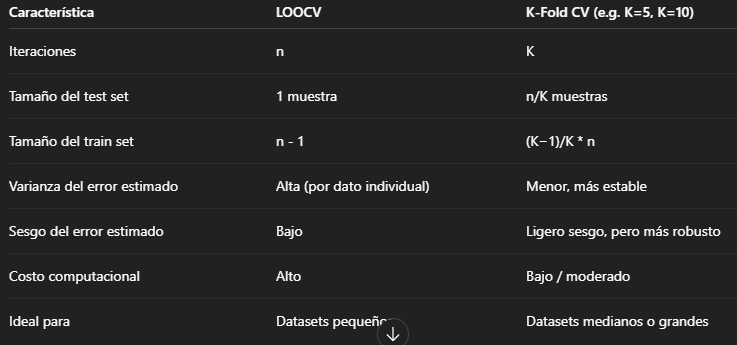

# 4.- Stratified K-Fold

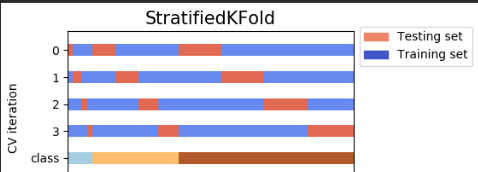

Se proporciona un conjunto de datos sintético que relaciona características de estudiantes con su rendimiento final (aprobó o no aprobó). Se desea predecir si un estudiante aprobará o no con base en el número de horas que estudia. 0 = No aprobó, 1 = Aprobó

- Implementación de Stratified K-Fold Cross Validation con K=5.

- Entrenamiento de un modelo de clasificación (por ejemplo, regresión logística).

- Cálculo del accuracy promedio.

- Comparación breve con una validación cruzada sin estratificar: ¿por qué podría ser menos confiable en este caso?

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([0,0,0,1,0,1,1,1,1,1])

# Modelo
model = LogisticRegression()

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Resultados
print(f"Accuracy promedio (Stratified 5-Fold): {np.mean(accuracies):.4f}")


Accuracy promedio (Stratified 5-Fold): 0.8000


c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Usar Stratified K-Fold es útil porque asegura que cada subconjunto tenga representadas ambas clases (aprobó/no aprobó) de manera proporcional. Esto mejora la estabilidad del rendimiento medido, especialmente en conjuntos pequeños o desbalanceados.

Si usáramos un K-Fold normal, podríamos tener folds sin representantes de alguna clase, lo que sesgaría el entrenamiento o inflaría artificialmente la métrica.

# 5.- Regularización

Se te proporciona un conjunto de datos sintético generado con scikit-learn, el cual contiene 100 muestras y 30 variables predictoras. Solo 5 de estas variables influyen realmente en la variable objetivo, el resto son ruido.

Tu tarea es:

- Ajustar un modelo de regresión lineal sin regularización y evaluar su rendimiento.

- Ajustar un modelo Ridge (L2) y comparar sus resultados con el modelo sin regularización.

- Ajustar un modelo Lasso (L1) y observar qué coeficientes son reducidos a cero.

- Ajustar un modelo Elastic Net y usar validación cruzada para encontrar la mejor combinación de hiperparámetros alpha y l1_ratio.

- Comparar los errores (MSE) y los coeficientes obtenidos en cada caso.

- Concluir cuál es el modelo más adecuado para este tipo de problema y justificarlo.

📦 Entregables esperados

- Notebook o archivo .py con el código.

- Comentarios explicativos paso a paso.

- Tabla con los errores de validación (MSE o RMSE) de cada modelo.

- Gráfica de comparación de coeficientes.

- Conclusión escrita en máximo 10 líneas justificando qué técnica funcionó mejor y por qué.

Errores de prueba:
Lineal sin regularización: 292.30
Ridge: 345.70
Lasso: 798.30
Elastic Net: 294.25


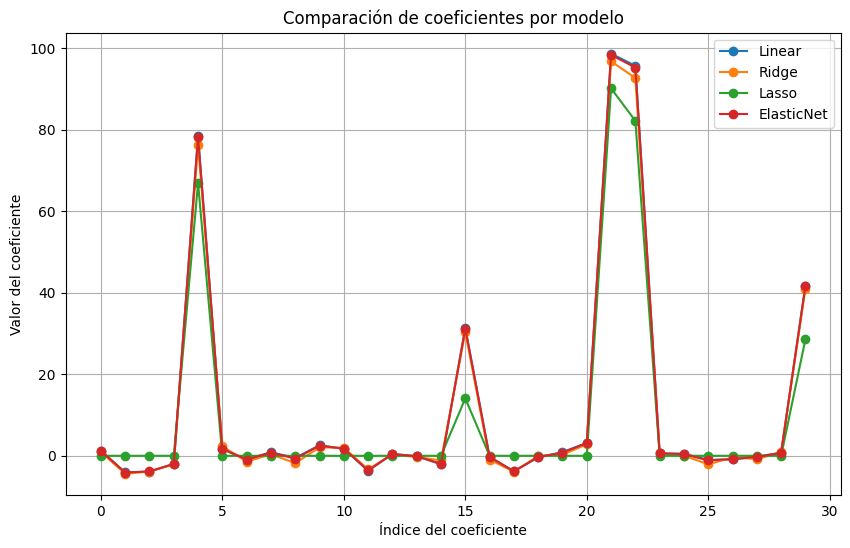

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Generación de datos sintéticos
X, y, coef = make_regression(n_samples=100, n_features=30, n_informative=5,
                             noise=10, coef=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modelo sin regularización
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 4. Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 5. Elastic Net con búsqueda de hiperparámetros
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = ElasticNet(max_iter=10000)
grid = GridSearchCV(elastic, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)
best_elastic = grid.best_estimator_
y_pred_elastic = best_elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# 6. Comparación
print("Errores de prueba:")
print(f"Lineal sin regularización: {mse_lr:.2f}")
print(f"Ridge: {mse_ridge:.2f}")
print(f"Lasso: {mse_lasso:.2f}")
print(f"Elastic Net: {mse_elastic:.2f}")

# 7. Gráfica de coeficientes
plt.figure(figsize=(10,6))
plt.plot(lr.coef_, 'o-', label='Linear')
plt.plot(ridge.coef_, 'o-', label='Ridge')
plt.plot(lasso.coef_, 'o-', label='Lasso')
plt.plot(best_elastic.coef_, 'o-', label='ElasticNet')
plt.legend()
plt.title('Comparación de coeficientes por modelo')
plt.xlabel('Índice del coeficiente')
plt.ylabel('Valor del coeficiente')
plt.grid(True)
plt.show()


También podemos observar que de las 30 características son los 5 de éstas son realmente relevantes.

# 6.- Matriz de confusión

Se te han proporcionado los resultados de cinco modelos de clasificación, ya entrenados y evaluados en distintos sectores. Cada modelo ha generado una matriz de confusión.

Entregables esperados para cada caso:

1. Interpretación de la matriz:

    - ¿Qué representa cada celda?

    - ¿Cuál es la clase positiva?

    - ¿Qué error es más grave en este contexto?

2. Cálculo e interpretación de métricas:

    - ccuracy, Precision, Recall, F1-score (para la clase positiva).

    - Justificación del mejor modelo en función del contexto (costos, prioridades, riesgos).

3. Conclusión de negocio: ¿Es usable este modelo tal como está? ¿Qué recomendarías mejorar?

#### Caso 1 Detección de cáncer. 

Un modelo predice si un paciente tiene cáncer (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{20} & \text{5} \\
\hline
\text{Clase negativa (0)} & \text{10} & \text{85} \\
\hline
\end{array}
$$

In [3]:
print("Precision global: ", 105/120)


print("---------Clase 1-----------")
print("Precision de clase: ", 20/30)
print("Sensibilidad de clase: ",20/25 )



print("---------Clase 0-----------")
print("Precision de clase: ", 85/90)
print("Sensibilidad de clase: ",85/95 )


Precision global:  0.875
---------Clase 1-----------
Precision de clase:  0.6666666666666666
Sensibilidad de clase:  0.8
---------Clase 0-----------
Precision de clase:  0.9444444444444444
Sensibilidad de clase:  0.8947368421052632


Asumiremos que es mucho peor decirle a un paciente que no tiene cancer cuando si lo tiene, que decirle que si tiene cuando no tiene (Aunque esta última llevaría a tomar decisiones apresuradas cuando en realidad no tendría que ser así como operaciones, por ejemplo)

Clase 1 (si tiene):

- Precision: el 67% de las predicciones positivas que hace el modelo, son correctas, 33% son incorrectas
- Sensibilidad: el 80% de los que de verdad tienen cancer son detectados correctamente, el modelo no captura a 20% de los que de verdad tienen cancer.



Clase 0 (no tiene):

- Precision: el 94% de las predicciones negativas que hace el modelo, son correctas y se equivoca en el 6%
- Sensibilidad: el 89% de los que de verdad no tienen cancer son detectados correctamente



Metricas a mejorar:

Nos interesa decirle a los enfermos que realmente estan enfermos con altisima prioridad
Por otro lado, deseariamos predecir bien a los no enfermos para evitar operaciones innecesarias, pero con menor proiridad

- Aumentar la sensibilidad de la clase 1 con alta prioridad
- mantener o aumentar la precision de la clase 0

        Nosostros podemos plantear dos ecenarios:
        - uno donde priorizamos al maximo la sensibilidad de la clase 1 y dejamos de lado la precision de la clase cero
        - Donde encontramos el equilibrio óptimo entre sensibilidad de la clase 11 y precision de la clase cero

#### Caso 2: Finanzas – Predicción de Morosos 

Modelo que predice si un cliente incumplirá su deuda (1) o no (0).

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 70 & 30 \\
\hline
\text{Clase negativa (0)} & 20 & 180 \\
\hline
\end{array}
$$


In [4]:
print("Precision global: ", 250/300)


print("---------Clase 1-----------")
print("Precision de clase: ", 70/90)
print("Sensibilidad de clase: ",70/100)



print("---------Clase 0-----------")
print("Precision de clase: ", 180/210)
print("Sensibilidad de clase: ",180/200 )

Precision global:  0.8333333333333334
---------Clase 1-----------
Precision de clase:  0.7777777777777778
Sensibilidad de clase:  0.7
---------Clase 0-----------
Precision de clase:  0.8571428571428571
Sensibilidad de clase:  0.9


#### Caso 3: Logística – Fallas de Entrega

Contexto: Se predice si una entrega llegará a tiempo (0) o tendrá una falla (1).


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 5 & 25 \\
\hline
\text{Clase negativa (0)} & 30 & 140 \\
\hline
\end{array}
$$


#### Caso 4: Tecnología – Cancelación de Suscripciones


Contexto: Se predice si un usuario cancelará su suscripción (1) o la mantendrá (0).



$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 20 & 15 \\
\hline
\text{Clase negativa (0)} & 30 & 250 \\
\hline
\end{array}
$$


#### Caso 5: Educación – Deserción Estudiantil


Contexto: Se predice si un estudiante desertará del curso (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 30 & 40 \\
\hline
\text{Clase negativa (0)} & 10 & 160 \\
\hline
\end{array}
$$


# 7.- Reporte de clasificacion

# 8.- Curva ROC y AUC

# 9.- Optimización de hiperparametros

# 10.- Conjunto de validacion

 Consecuencias de no tener conjunto de validación:
1. Sobreajuste al conjunto de prueba
El modelo aprende patrones específicos del test set (incluyendo ruido).

Se vuelve bueno solo en ese conjunto, pero malo en datos nuevos reales (producción).

2. Métricas engañosas
Las métricas de rendimiento (accuracy, F1, etc.) en el test set ya no son confiables.

Parecen más altas de lo que deberían porque el modelo fue ajustado con esa información.

3. Evaluación final sesgada
El test set deja de ser una evaluación honesta.

No puedes saber realmente cuán bien generaliza tu modelo.

4. Comparaciones entre modelos incorrectas
No puedes comparar de forma justa varios modelos o configuraciones.

Cualquier decisión basada en el test set estará contaminada.

5. Pérdida de capacidad de generalización
El modelo final puede tener alto rendimiento en el test set, pero fallar en producción.

6. Malas decisiones de negocio o implementación
Si implementas un modelo basado en ese test set contaminado, podrías tomar decisiones erróneas que afecten resultados reales.



🎯 Objetivo del ejercicio:

El objetivo de este ejercicio es comprender la función y utilidad de los subconjuntos de entrenamiento, validación y prueba al momento de entrenar y evaluar modelos de machine learning. Deberás:

- Realizar la correcta división del dataset.

- Entrenar un modelo de clasificación usando solo el conjunto de entrenamiento.

- Usar el conjunto de validación para ajustar hiperparámetros o evaluar diferentes modelos.

- Utilizar el conjunto de prueba para obtener una evaluación final del rendimiento del modelo óptimo seleccionado.

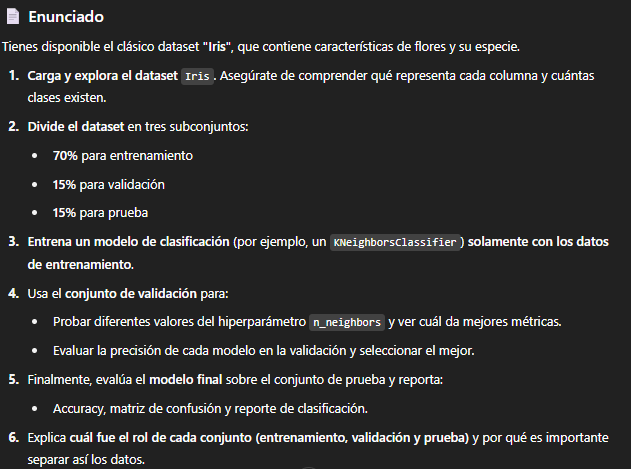

- Entrenamiento: el modelo aprende patrones.

- Validación: se ajustan los hiperparámetros o se comparan modelos sin tocar los datos de prueba.

- Prueba: evaluación final. Nunca se debe usar durante entrenamiento ni ajustes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. División de datos (70% entrenamiento, 15% validación, 15% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
#x_temp representa un subconjunto temporal de los datos que se utiliza para dividir posteriormente en validación y prueba.

# Verificar tamaños
print(f"Entrenamiento: {len(X_train)}, Validación: {len(X_val)}, Prueba: {len(X_test)}")




Entrenamiento: 22806, Validación: 4887, Prueba: 4888


In [3]:
# 3. Entrenar varios modelos con diferentes k usando validación
results = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    results.append((k, acc))

# 4. Resultados en validación
df_results = pd.DataFrame(results, columns=["k", "validation_accuracy"])
display(df_results)

# Elegir el mejor modelo
best_k = df_results.sort_values(by="validation_accuracy", ascending=False).iloc[0]['k']
print(f"Mejor k encontrado: {int(best_k)}")

# 5. Entrenamiento final y evaluación en prueba
final_model = KNeighborsClassifier(n_neighbors=int(best_k))
final_model.fit(X_train, y_train)
test_preds = final_model.predict(X_test)

print("Accuracy en prueba:", accuracy_score(y_test, test_preds))
print("Matriz de confusión:\n", confusion_matrix(y_test, test_preds))
print("Reporte de clasificación:\n", classification_report(y_test, test_preds))

,k,validation_accuracy
0,1,0.815838
1,2,0.833231
2,3,0.825046
3,4,0.835482
4,5,0.836096
5,6,0.841211
6,7,0.838961
7,8,0.841211
8,9,0.839984
9,10,0.838756


Mejor k encontrado: 8
Accuracy en prueba: 0.8351063829787234
Matriz de confusión:
 [[3622  199]
 [ 607  460]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      3821
           1       0.70      0.43      0.53      1067

    accuracy                           0.84      4888
   macro avg       0.78      0.69      0.72      4888
weighted avg       0.82      0.84      0.82      4888



En este ejercicio noté que entrenar el modelo y evaluarlo en los mismos datos da una idea falsa de su rendimiento. Al usar el conjunto de validación, pude comparar versiones del modelo sin afectar la evaluación final. El conjunto de prueba me sirvió para tener una estimación realista de cómo se comportará mi modelo en datos nuevos.

# 11.- Búsqueda en cuadrícula

# 12.- Busqueda aleatoria

# 13.- KNN

# 14.- Selección de características 

# 15.- Pipeline

# 16.- Evaluar múltiples modelos